
# Project 2:  Titanic Data Exploration and Preparation
**Author:** Beth Spornitz  
**Date:** October 31, 2025   
**Objective:**  Analyze and prepare the Titanic dataset for machine learning.



## Introduction
This project uses a combination of Python and Markdown to create an initial data story of the sinking of the Titanic. Class, Sex, and Age will all be explored in relation to survival.

## Imports
Import the necessary Python libraries for this notebook.  

In [199]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from IPython.display import display


## Section 1. Load and Explore the Data

### 1.1 Load the dataset and display the first 10 rows



In [200]:
# Load Titanic dataset
titanic = sns.load_dataset('titanic')

In [201]:
# Display basic info about the dataset
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [202]:
# Display the first 10 rows
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


### 1.2 Check for missing values and display summary statistics


In [203]:

# Check for missing values
titanic.isnull().sum()






survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [204]:
# Display summary statistics
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [205]:
# Display correlations (numeric only)
titanic.corr(numeric_only=True)

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


Reflection 1:
1) How many data instances are there?  891  
2) How many features are there? 15  
3) What are the names?  ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']  
4) Are there any missing values?  Yes there are missing values.  
   - age is missing 177  
   - deck is missing 688  
   - embarked is missing 2  
   - embark_town is missing 2  
5) Are there any non-numeric features? Yes. Sex, embarked, class, who, deck, embark_town, and alive.  
6) Are the data instances sorted on any of the attributes?  No.  
7) What are the units of age? Years  
8) What are the minimum, median and max age?  
   - Minimum -.42  
   - Median - 25  
   - Maximum - 80  
9)  What two different features have the highest correlation?  Fare and Passenger Class have a high correlation.  
10) Are there any categorical features that might be useful for prediction?  Passenger Class and Sex  

## Section 2. Data Exploration and Preparation
We'll explore data patterns, handle missing values, and create new features.

### 2.1 Explore Data Patterns and Distributions
We'll visualize relationships between numerical and categorical variables using scatter plots, histograms, and count plots.


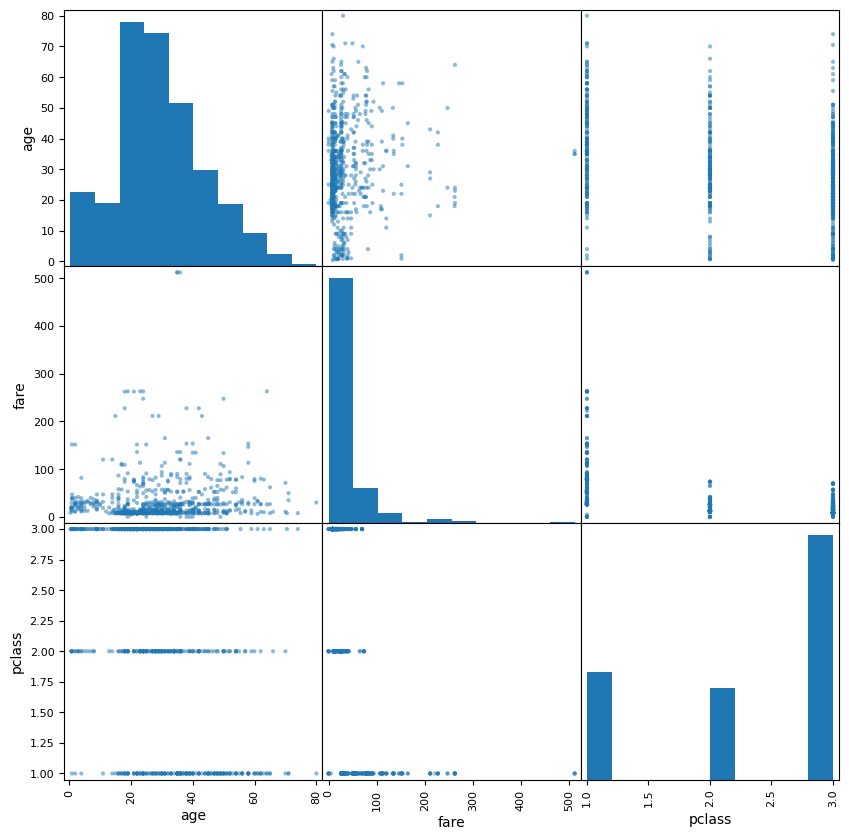

In [206]:
# Scatter matrix (numeric attributes)
attributes = ['age', 'fare', 'pclass']
scatter_matrix(titanic[attributes], figsize=(10, 10))
plt.show()

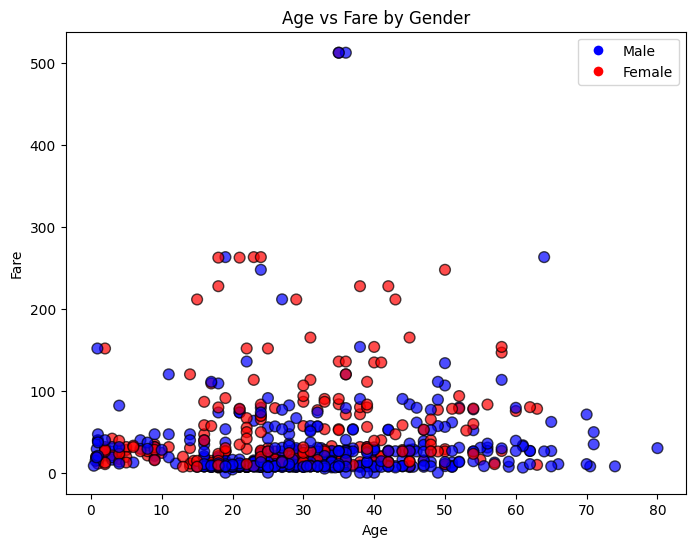

In [207]:
# Scatter plot: Age vs Fare by Gender
# Define colors for male/female
colors = titanic['sex'].map({'male': 'blue', 'female': 'red'})

plt.figure(figsize=(8, 6))
plt.scatter(
    titanic['age'],
    titanic['fare'],
    c=colors,
    alpha=0.7,
    edgecolor='k',
    s=60
)

plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare by Gender')
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='Male', markerfacecolor='blue', markersize=8),
    plt.Line2D([0], [0], marker='o', color='w', label='Female', markerfacecolor='red', markersize=8)
])
plt.show()


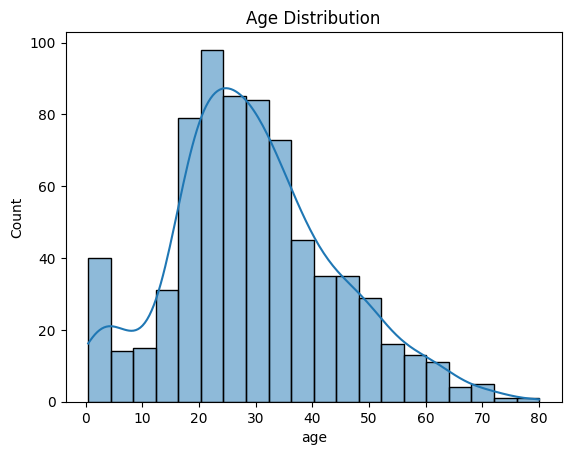

In [208]:
# Histogram of Age
sns.histplot(titanic['age'], kde=True)
plt.title('Age Distribution')
plt.show()


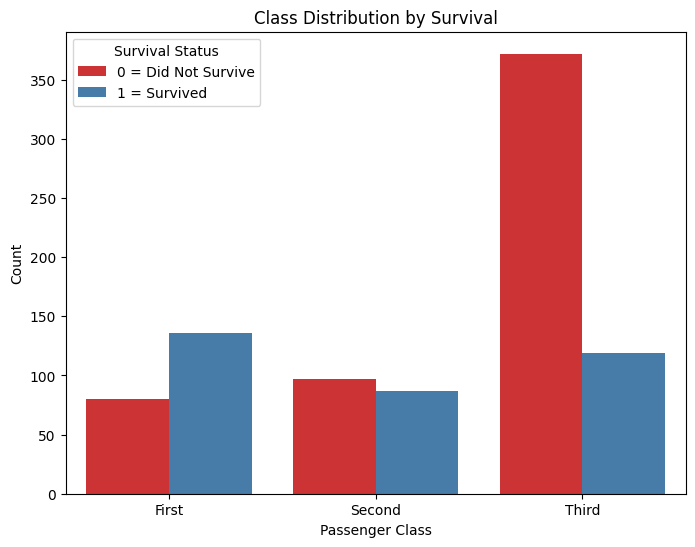

In [209]:
# Count Plot: Class vs Survival
plt.figure(figsize=(8, 6))
sns.countplot(x='class', hue='survived', data=titanic, palette='Set1')
plt.title('Class Distribution by Survival')
plt.xlabel('Passenger Class')
plt.ylabel('Count')

# Customize legend to clarify 0 and 1 meaning
plt.legend(title='Survival Status', labels=['0 = Did Not Survive', '1 = Survived'])
plt.show()


Survival Table by Class

In [210]:
# Survival counts by passenger class
survival_table = (
    titanic.groupby('class', observed=False)['survived']
    .value_counts()
    .unstack()
    .fillna(0)
)

# Add survival rate column
survival_table['Survival Rate'] = (
    survival_table[1] / (survival_table[0] + survival_table[1])
).round(2)

# Rename columns for clarity
survival_table.columns = ['Did Not Survive (0)', 'Survived (1)', 'Survival Rate']

# Display the formatted table
survival_table


,Did Not Survive (0),Survived (1),Survival Rate
class,,,
First,80,136,0.63
Second,97,87,0.47
Third,372,119,0.24


#### Reflection 2.1
1. What patterns or anomalies do you notice? 
   - The scatterplot shows that fare and passenger class are inversely related.  This makes sense becaue passengers in a higher class number (3) paid lower fares. 
   - The age distribution is skewed slightly to the right indicating more passegers were on the younger side.
2. Do any features stand out as potential predictors?   
   - Yes.  Sex, passeger class, and fare stand out.  
3. Are there visible class imbalances?  
   - Yes.  More 3rd class passengers perished than the other two classes.  However, there were higher numbers of 3rd class passengers on board.  From the survival table, 63% of first class passengers survived while only 24% of 3rd class passengers.  


### 2.2 Handle Missing Values and Clean Data


**Goal.** Fill essential missing values in a way that’s safe to re-run and won’t trigger chained-assignment warnings in newer versions of pandas.

**Plan**
- `age` → fill with **median** (numeric).
- `embark_town` → fill with **mode** (most frequent string).
- `embarked` → fill with **mode** (most frequent code: C/Q/S).  
  *(We’ll convert it to numbers in **2.3 Feature Engineering**.)*
- Leave `deck` as-is (very sparse); optionally engineer a flag later.

> **Why no `inplace=True` on slices?**  
> In pandas 3.0+, chained assignment on a column slice may not write back to the original DataFrame.  
> Assigning the filled result **back to the column** (e.g., `df['col'] = df['col'].fillna(...)`) is the recommended pattern.

### 2.2.1 Inspect Missing Values


In [211]:
# Show the largest sources of missingness
titanic.isnull().sum().sort_values(ascending=False).head(12)

deck           688
age            177
embarked         2
embark_town      2
sex              0
pclass           0
survived         0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
dtype: int64

### 2.2.2 Fill Essential Missing Values (idempotent)
We fill `age` with its median and `embark_town` / `embarked` with their modes.  
This cell is safe to run multiple times.

In [212]:
# Ensure we have a writable copy (harmless if already a DataFrame)
titanic = titanic.copy()

# Fill numeric
titanic['age'] = titanic['age'].fillna(titanic['age'].median())

# Fill categorical strings with mode BEFORE any mapping we’ll do later
titanic['embark_town'] = titanic['embark_town'].fillna(titanic['embark_town'].mode()[0])
titanic['embarked']    = titanic['embarked'].fillna(titanic['embarked'].mode()[0])


### 2.2.3 Verify the Fixes
We expect `age`, `embark_town`, and `embarked` to have **0** missing values after fills.

In [213]:
# Focused null check on the columns we just handled
print("Null counts (key columns after fill):")
print(titanic[['age', 'embark_town', 'embarked']].isnull().sum())

# Quick peek to confirm values look reasonable
print("\nSample of filled columns:")
display(titanic[['age', 'embark_town', 'embarked']].head(10))

# Optional: show overall remaining nulls to see what's left (e.g., 'deck')
print("\nTop remaining nulls (if any):")
print(titanic.isnull().sum().sort_values(ascending=False).head(10))


Null counts (key columns after fill):
age            0
embark_town    0
embarked       0
dtype: int64

Sample of filled columns:


,age,embark_town,embarked
0,22.0,Southampton,S
1,38.0,Cherbourg,C
2,26.0,Southampton,S
3,35.0,Southampton,S
4,35.0,Southampton,S
5,28.0,Queenstown,Q
6,54.0,Southampton,S
7,2.0,Southampton,S
8,27.0,Southampton,S
9,14.0,Cherbourg,C



Top remaining nulls (if any):
deck        688
pclass        0
survived      0
age           0
sibsp         0
parch         0
sex           0
fare          0
embarked      0
who           0
dtype: int64


#### Reflection 2.2
- Why is median a reasonable choice for filling `age`?  
   - It avoids skew from extreme ages.
- Why do we fill `embark_town` / `embarked` with the mode?  
  - It replaces missing locations with the most comon port.

### 2.3 Feature Engineering
We’ll create new derived variables that could improve prediction performance.

In [214]:
# Add Family Size feature
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

In [215]:
# Convert categorical data to numeric
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})


In [216]:
# Convert 'alone' to integer
titanic['alone'] = titanic['alone'].astype(int)


In [217]:
# 1) Peek at the new / changed columns
display(titanic[['sibsp','parch','family_size','sex','embarked','alone']].head())

# 2) Check dtypes to ensure numeric conversion happened
print("\nDtypes:")
print(titanic[['sex','embarked','alone','family_size']].dtypes)

# 3) Checks
print("\nUnique values:")
print("sex:", titanic['sex'].unique())
print("embarked (coded):", titanic['embarked'].unique())
print("alone:", titanic['alone'].unique())

# 4) Are there any NaNs left in the engineered columns?
print("\nNull counts (engineered columns):")
print(titanic[['family_size','sex','embarked','alone']].isnull().sum())


,sibsp,parch,family_size,sex,embarked,alone
0,1,0,2,0,2,0
1,1,0,2,1,0,0
2,0,0,1,1,2,1
3,1,0,2,1,2,0
4,0,0,1,0,2,1



Dtypes:
sex            int64
embarked       int64
alone          int64
family_size    int64
dtype: object

Unique values:
sex: [0 1]
embarked (coded): [2 0 1]
alone: [0 1]

Null counts (engineered columns):
family_size    0
sex            0
embarked       0
alone          0
dtype: int64


#### Reflection 2.3
1. Why might family size be useful for predicting survival? 
   - Larger families may be a sign of lower class and families may have chosen to stay together if they all could not get on the lifeboat together. 
3. Why convert categorical data to numeric?  
   - Machine learning models cannot interpret text labels so it must be changed to numerica to perfom computations.

## 3. Feature Selection and Justification

Goal: Identify which features (inputs) we’ll use to predict survival on the Titanic dataset, and define our target variable.

### 3.1 Choose Features and Target
We'll select features that are numeric and meaningful predictors of survival.  
Based on earlier exploration and feature engineering, these include:

- age – passengers’ age in years  
- fare – the price paid for the ticket  
- pclass – passenger class (1 = upper, 3 = lower)  
- sex – encoded as 0 = male, 1 = female  
- family_size – total family members aboard (engineered feature)

The target variable will be:
- survived – 0 = did not survive, 1 = survived


In [218]:
# Define features (X) and target (y)
X = titanic[['age', 'fare', 'pclass', 'sex', 'family_size']]
y = titanic['survived']

# Display the first few rows to confirm
X.head()


,age,fare,pclass,sex,family_size
0,22.0,7.2500,3,0,2
1,38.0,71.2833,1,1,2
2,26.0,7.9250,3,1,1
3,35.0,53.1000,1,1,2
4,35.0,8.0500,3,0,1


### 3.2 Define X and y
We’ve assigned:
- X → the input features for prediction
- y → the target variable representing survival (0 = no, 1 = yes)


In [219]:
# Quick check: confirm dimensions and alignment
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("\nColumn names in X:", list(X.columns))


Shape of X: (891, 5)
Shape of y: (891,)

Column names in X: ['age', 'fare', 'pclass', 'sex', 'family_size']


#### Reflection 3

1. Why are these features selected?  
   These features are primarily numeric and have logical relationships to survival:
   - Passenger class and fare reflect socioeconomic status.
   - Sex is historically linked to survival chances (“women and children first”).
   - Family size captures group travel dynamics that might influence rescue likelihood.
   - Age may indicate priority during evacuation.

2. Which features are likely to be most predictive of survival?  
   - Sex and passenger class are typically the strongest predictors, since women and first-class passengers were much more likely to survive.


## 4. Splitting

Goal: Split the dataset into training and test sets to prepare for model building and evaluation.

We will first perform a basic random split, then a stratified split to maintain class balance between survivors and non-survivors.


### 4.1 Basic Train/Test Split
We will randomly split the data into a training set (80%) and a test set (20%) using scikit-learn's train_test_split function.


In [220]:
from sklearn.model_selection import train_test_split

# Perform a basic split
train_set, test_set = train_test_split(titanic, test_size=0.2, random_state=123)

# Display basic info about the split
print('Train size:', len(train_set))
print('Test size:', len(test_set))


Train size: 712
Test size: 179


### 4.2 Check Class Distribution for Basic Split
We will compare the proportion of survivors (1) and non-survivors (0) in the training and test sets to see if the balance is consistent.


In [221]:
print("Original class distribution:")
print(titanic['survived'].value_counts(normalize=True))
print("\nTraining set distribution:")
print(train_set['survived'].value_counts(normalize=True))
print("\nTest set distribution:")
print(test_set['survived'].value_counts(normalize=True))


Original class distribution:
survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

Training set distribution:
survived
0    0.610955
1    0.389045
Name: proportion, dtype: float64

Test set distribution:
survived
0    0.636872
1    0.363128
Name: proportion, dtype: float64


### 4.3 Stratified Train/Test Split
To ensure that the proportion of survivors and non-survivors is preserved in both sets, we use StratifiedShuffleSplit. 
This method creates splits that maintain the same class ratios as the original dataset.


In [222]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(titanic, titanic['survived']):
    strat_train_set = titanic.iloc[train_indices]
    strat_test_set = titanic.iloc[test_indices]

print('Stratified train size:', len(strat_train_set))
print('Stratified test size:', len(strat_test_set))


Stratified train size: 712
Stratified test size: 179


### 4.4 Compare Class Distributions
We will now compare the original class distribution with both the random and stratified splits to confirm that stratification produces a closer match.


In [223]:
print("Original class distribution:")
print(titanic['survived'].value_counts(normalize=True))
print("\nBasic split (train) class distribution:")
print(train_set['survived'].value_counts(normalize=True))
print("\nBasic split (test) class distribution:")
print(test_set['survived'].value_counts(normalize=True))
print("\nStratified split (train) class distribution:")
print(strat_train_set['survived'].value_counts(normalize=True))
print("\nStratified split (test) class distribution:")
print(strat_test_set['survived'].value_counts(normalize=True))


Original class distribution:
survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

Basic split (train) class distribution:
survived
0    0.610955
1    0.389045
Name: proportion, dtype: float64

Basic split (test) class distribution:
survived
0    0.636872
1    0.363128
Name: proportion, dtype: float64

Stratified split (train) class distribution:
survived
0    0.616573
1    0.383427
Name: proportion, dtype: float64

Stratified split (test) class distribution:
survived
0    0.614525
1    0.385475
Name: proportion, dtype: float64


#### Reflection 4

1. Why might stratification improve model performance?  
   Stratification ensures the training and test sets reflect the same proportions of survivors and non-survivors, helping the model generalize more accurately.

2. How close are the training and test distributions to the original dataset?  
   The stratified split closely matches the original distribution, while the basic split may differ slightly due to random sampling.

3. Which split method produced better class balance?  
   The stratified split produced a more balanced and representative dataset, making it preferable for most modeling tasks.


## 5. Conclusion

Goal: Summarize the key findings from the Titanic data preparation process and reflect on what was learned.

### 5.1 Summary
In this project, we performed a complete data preparation workflow on the Titanic dataset.

Steps included:
- Importing and inspecting the dataset using pandas and seaborn
- Exploring relationships with scatter plots, histograms, and count plots
- Cleaning missing values using median and mode
- Engineering new features such as family_size
- Encoding categorical variables into numeric form
- Splitting the data into training and test sets using both basic and stratified methods

The resulting dataset is fully numeric, clean, and ready for model training in the next phase.


### 5.2 Next Steps
The cleaned and prepared dataset can now be used to build classification models predicting survival on the Titanic.  
Possible next steps include:

- Applying logistic regression or decision trees for prediction  
- Evaluating model accuracy using the stratified data splits  
- Performing feature importance analysis to determine which variables contribute most to survival
